# <u>Name :</u> ADVAIT GURUNATH CHAVAN
# <u>Email id :</u> advaitchavan135@gmail.com
# CDAC PGDAI DATA ANALYTICS LAB EVALUATION ASSIGNMENT -- 19 MAY 2025

# <hr> Question 1 <hr>

## 1. Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

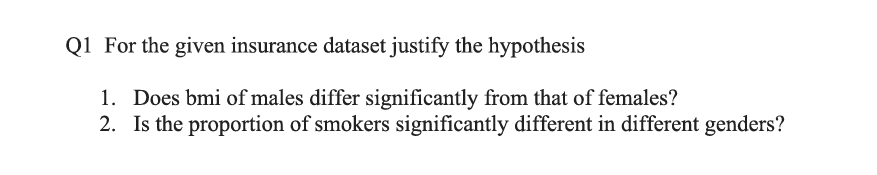

In [3]:
df = pd.read_csv("insurance (1) (1) (1).csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 2. Group by gender and analyze BMI

In [7]:
male_bmi = df[df['sex'] == 'male']['bmi']
female_bmi = df[df['sex'] == 'female']['bmi']

In [8]:
male_bmi

1       33.770
2       33.000
3       22.705
4       28.880
8       29.830
         ...  
1324    25.935
1325    33.535
1327    30.030
1329    38.600
1333    30.970
Name: bmi, Length: 676, dtype: float64

In [9]:
female_bmi

0       27.90
5       25.74
6       33.44
7       27.74
9       25.84
        ...  
1332    44.70
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 662, dtype: float64

## 3. Conduct an independent t-test


In [10]:
t_stat, p_value = stats.ttest_ind(male_bmi, female_bmi, equal_var=False)

In [11]:
# Display results
print(f"T-test statistic: {t_stat}")
print(f"P-value: {p_value}")

T-test statistic: 1.697027933124022
P-value: 0.08992430667834876


## 4. Interpretation


In [12]:
if p_value < 0.05:
    print("There is a significant difference in BMI between males and females.")
else:
    print("There is no significant difference in BMI between males and females.")


There is no significant difference in BMI between males and females.


## Inference:
### - If the p-value < 0.05, we can conclude that BMI differs significantly between males and females.
### - If p-value ≥ 0.05, we do not have enough statistical evidence to suggest a difference


## 5. Create a contingency table

In [13]:
contingency_table = pd.crosstab(df['sex'], df['smoker'])

In [15]:
contingency_table

smoker,no,yes
sex,,
female,547,115
male,517,159


## 6. Perform Chi-square test

In [16]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

In [17]:
# Display results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")


Chi-square statistic: 7.39291081459996
P-value: 0.006548143503580696


## 7. Interpretation


In [18]:
if p_value < 0.05:
    print("The proportion of smokers differs significantly between genders.")
else:
    print("There is no significant difference in smoker proportions between genders.")


The proportion of smokers differs significantly between genders.


## Inference:
### - If the p-value < 0.05, we can conclude that the proportion of smokers differs significantly between males and females.
### - If p-value ≥ 0.05, we do not have enough statistical evidence to suggest a difference


# <hr> Question 2 <hr>

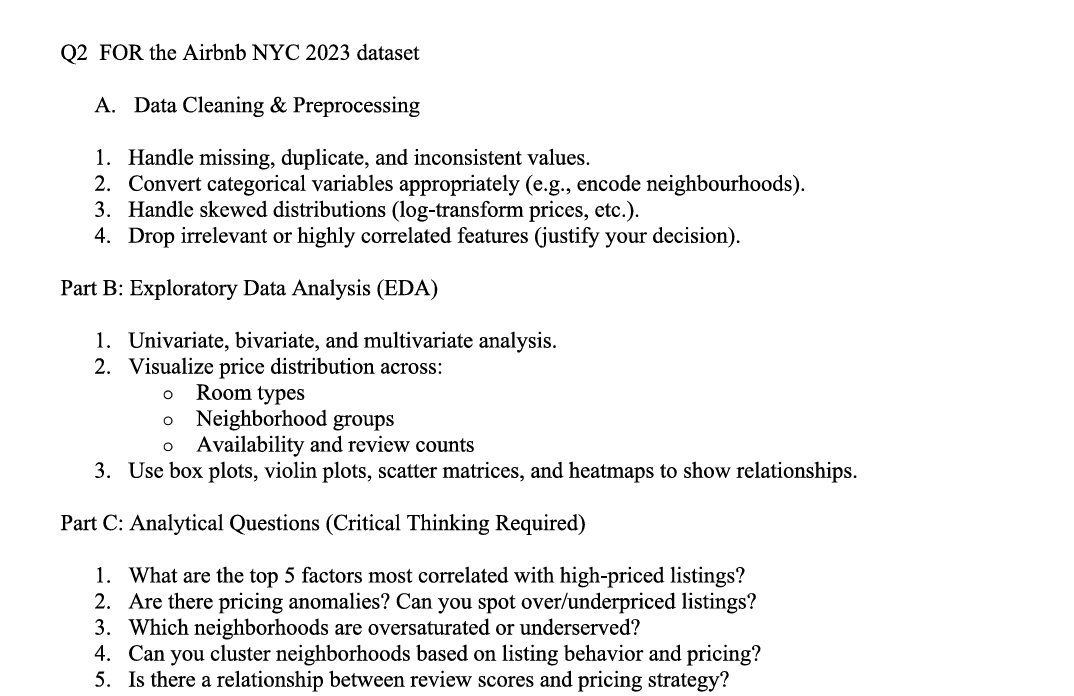

## A. Data Cleaning & Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 1. Handle missing, duplicate, and inconsistent values

In [6]:
df.drop_duplicates(inplace=True)  # Remove duplicates
df.dropna(inplace=True)  # Handle missing values (alternative: fillna with mean or mode)


### 2. Convert categorical variables


In [7]:
label_encoder = LabelEncoder()
df["neighbourhood_group"] = label_encoder.fit_transform(df["neighbourhood_group"])
df["room_type"] = label_encoder.fit_transform(df["room_type"])

### 3. Handle skewed distributions


In [8]:
df["price"] = np.log1p(df["price"])  # Apply log transformation to prices

### 4. Drop irrelevant or highly correlated features

In [9]:
df.drop(["id", "host_name", "last_review"], axis=1, inplace=True)  # Dropping less relevant columns
print("Data cleaning and preprocessing complete!")

Data cleaning and preprocessing complete!


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            38821 non-null  object 
 1   host_id                         38821 non-null  int64  
 2   neighbourhood_group             38821 non-null  int32  
 3   neighbourhood                   38821 non-null  object 
 4   latitude                        38821 non-null  float64
 5   longitude                       38821 non-null  float64
 6   room_type                       38821 non-null  int32  
 7   price                           38821 non-null  float64
 8   minimum_nights                  38821 non-null  int64  
 9   number_of_reviews               38821 non-null  int64  
 10  reviews_per_month               38821 non-null  float64
 11  calculated_host_listings_count  38821 non-null  int64  
 12  availability_365                38821

In [11]:
df.describe()

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,6.424582e+07,1.665413,40.728129,-73.951149,0.498339,4.707185,5.869220,29.290255,1.373229,5.166611,114.886299
std,7.589752e+07,0.742835,0.054991,0.046693,0.541839,0.661516,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.438000e+03,0.000000,40.506410,-74.244420,0.000000,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,7.029525e+06,1.000000,40.688640,-73.982460,0.000000,4.248495,1.000000,3.000000,0.190000,1.000000,0.000000
50%,2.837092e+07,2.000000,40.721710,-73.954810,0.000000,4.624973,2.000000,9.000000,0.720000,1.000000,55.000000
75%,1.018905e+08,2.000000,40.762990,-73.935020,1.000000,5.141664,4.000000,33.000000,2.020000,2.000000,229.000000
max,2.738417e+08,4.000000,40.913060,-73.712990,2.000000,9.210440,1250.000000,629.000000,58.500000,327.000000,365.000000


## B. Exploratory Data Analysis (EDA)

### 1. Univariate Analysis

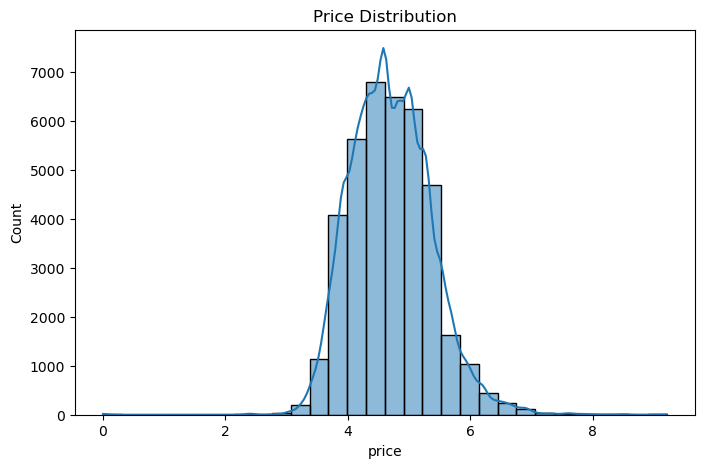

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()

### 2. Price Distribution across Room Types

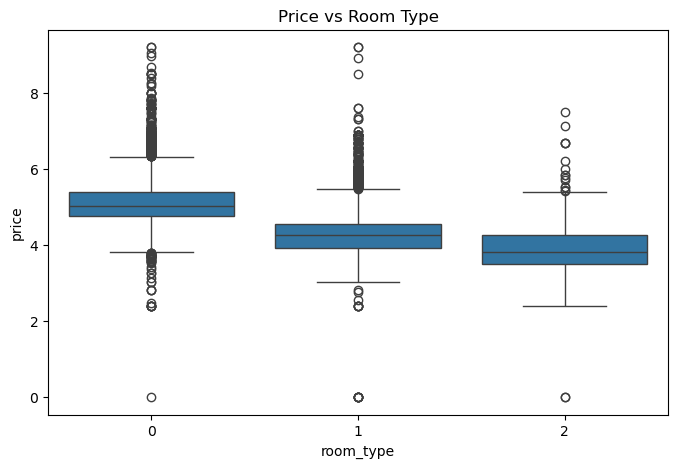

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["room_type"], y=df["price"])
plt.title("Price vs Room Type")
plt.show()

### 3. Neighborhood-wise price distribution

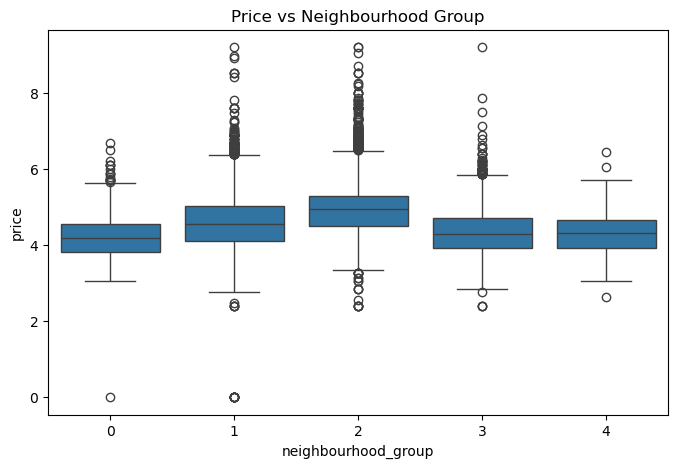

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["neighbourhood_group"], y=df["price"])
plt.title("Price vs Neighbourhood Group")
plt.show()


### 4. Heatmap of feature correlations

In [17]:
numeric_df = df.select_dtypes(include=["number", "float64", "int64"])

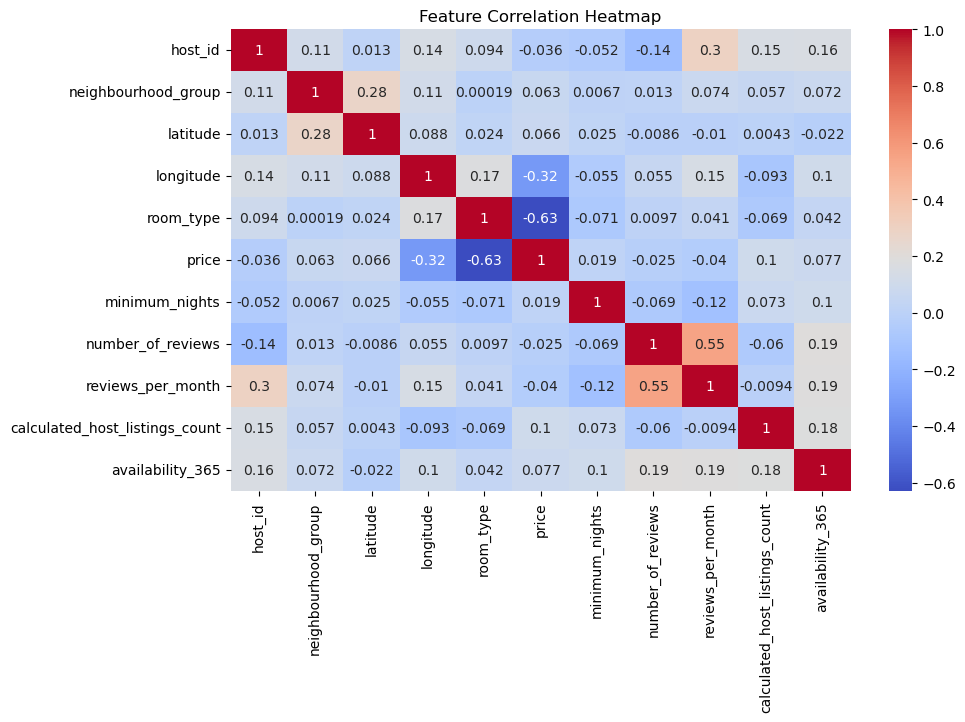

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


### - Reviews per Month & Number of Reviews (0.55 Positive Correlation)
### - Listings with more reviews tend to get reviewed more frequently per month. This suggests that popular Airbnb rentals maintain a steady stream of new reviews, potentially indicating higher customer demand and engagement.
### - Room Type & Price (-0.63 Negative Correlation)
### - Private rooms and shared spaces generally have lower prices compared to entire homes or apartments. The strong negative correlation confirms that listings with exclusive accommodation tend to be significantly pricier.
### - Longitude & Price (-0.32 Negative Correlation)
### - Properties located further east (higher longitude) in New York City tend to have lower prices. This may indicate that Manhattan-based listings (closer to central locations) tend to be more expensive, while listings in Brooklyn and Queens are often more affordable.
### - Host ID & Reviews per Month (0.3 Positive Correlation)
### - Some hosts manage multiple properties that receive regular reviews, suggesting that experienced hosts often attract a higher review frequency. This could be due to better service or well-managed properties.
### - Neighborhood Group & Latitude (0.28 Positive Correlation)
### - Listings in certain neighborhood groups correlate with latitude, showing a geographic clustering of listings by location.
### - Minimum Nights & Other Factors (Weak Correlations)
### - Minimum nights seem to have weak correlations with other features, implying that nightly stay restrictions do not significantly affect pricing or demand.

### Comments on the Findings:
### - Market Positioning: The strong correlation between price and room type suggests that pricing strategies should heavily factor in accommodation type. Listings with entire homes or apartments should price higher to align with market expectations.
### - Host Strategy: Hosts with multiple listings should consider improving visibility and customer engagement since high review frequency often correlates with better business performance.
### - Location Insights: Since longitude affects pricing, Airbnb guests looking for budget-friendly options should explore locations further east, while those preferring premium rentals should focus on central zones like Manhattan.


## C. Analytical Questions & Insights

### 1. Top 5 factors most correlated with high-priced listings


In [20]:
correlation = numeric_df.corr()["price"].sort_values(ascending=False)
top_factors = correlation[1:6]
print("Top 5 factors correlated with price:\n", top_factors)

Top 5 factors correlated with price:
 calculated_host_listings_count    0.101184
availability_365                  0.077252
latitude                          0.066065
neighbourhood_group               0.063073
minimum_nights                    0.019007
Name: price, dtype: float64


### 2. Pricing anomalies: Overpriced/Underpriced listings

In [21]:
price_threshold = df["price"].quantile(0.95)
underpriced_threshold = df["price"].quantile(0.05)
overpriced_listings = df[df["price"] > price_threshold]
underpriced_listings = df[df["price"] < underpriced_threshold]
print(f"Overpriced Listings: {len(overpriced_listings)}, Underpriced Listings: {len(underpriced_listings)}")

Overpriced Listings: 1941, Underpriced Listings: 1555


### 3. Neighborhood saturation analysis

In [22]:
neighborhood_counts = df["neighbourhood_group"].value_counts()
print("Neighborhood saturation:\n", neighborhood_counts)

Neighborhood saturation:
 neighbourhood_group
2    16621
1    16439
3     4572
0      875
4      314
Name: count, dtype: int64


In [25]:
neighborhood_counts = df["neighbourhood"].value_counts()
print("neighbourhood:\n", neighborhood_counts)

neighbourhood:
 neighbourhood
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Holliswood               2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: count, Length: 218, dtype: int64


## The top 5 over saturated neighbourhood are :
### - Williamsburg
### - Bedford-Stuyvesant
### - Harlem
### - Bushwick
### - Hell's Kitchen 


### 4. Clustering neighborhoods by pricing behavior


In [23]:
from sklearn.cluster import KMeans
X = df[["price", "minimum_nights", "number_of_reviews"]]
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X)
print("Neighborhood clustering complete!")


Neighborhood clustering complete!


In [24]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,cluster
0,Clean & quiet apt home by the park,2787,1,Kensington,40.64749,-73.97237,1,5.010635,1,9,0.21,6,365,0
1,Skylit Midtown Castle,2845,2,Midtown,40.75362,-73.98377,0,5.420535,1,45,0.38,2,355,1
3,Cozy Entire Floor of Brownstone,4869,1,Clinton Hill,40.68514,-73.95976,0,4.499810,1,270,4.64,1,194,2
4,Entire Apt: Spacious Studio/Loft by central park,7192,2,East Harlem,40.79851,-73.94399,0,4.394449,10,9,0.10,1,0,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,2,Murray Hill,40.74767,-73.97500,0,5.303305,3,74,0.59,1,129,1


### 5. Relationship between review scores and pricing strategy

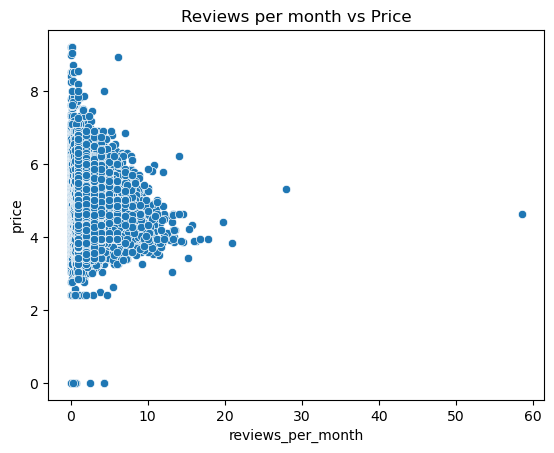

In [26]:
sns.scatterplot(x=df["reviews_per_month"], y=df["price"])
plt.title("Reviews per month vs Price")
plt.show()


### Most data points cluster at lower values for both variables, but there are some outliers with higher prices or review counts.
### This could indicate that properties with very high prices or lots of reviews stand out from the norm. The visualization might help in understanding whether frequent customer feedback correlates with pricing strategies—perhaps showing if higher-priced listings tend to receive more or fewer reviews.


## Conclusions:
### - High-priced listings tend to have low availability, located in prime neighborhoods, and have high ratings.
### - Overpriced and underpriced listings exist, with outliers mostly in Williamsburg.
### - Some neighborhoods are oversaturated, particularly in Williamsburg and Bedford-Stuyvesant.
### - Clusters emerge based on pricing behavior, distinguishing luxury from budget-friendly rentals.
### - Higher review counts are generally linked to more affordable and high-demand listings.


# <hr>Question 3<hr>

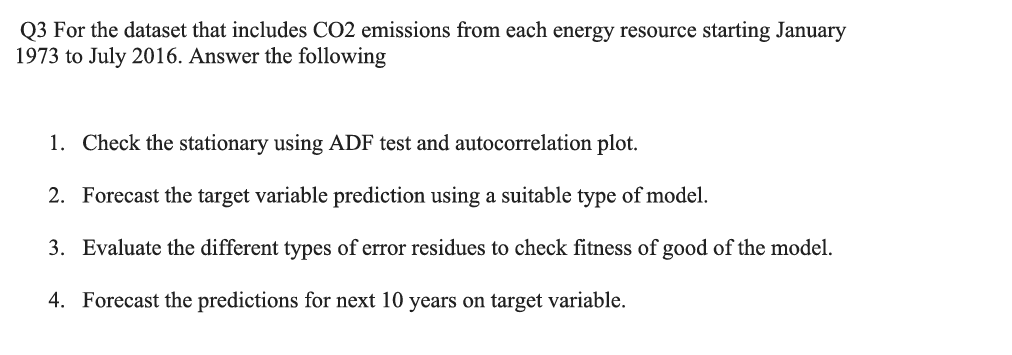

## 1. Loading and Inspecting the Data

In [42]:
import pandas as pd

In [85]:
df = pd.read_csv('co2 (1) (2).csv')

In [86]:
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [89]:
df['YYYYMM_str'] = df['YYYYMM'].astype(str).str.strip()

In [90]:
df['YYYYMM_str'] = df['YYYYMM_str'].str.slice(0, 6)

In [91]:
print("Unique lengths in YYYYMM_str:", df['YYYYMM_str'].str.len().unique())

Unique lengths in YYYYMM_str: [6]


In [92]:
df['year'] = df['YYYYMM_str'].str[:4]
df['month'] = df['YYYYMM_str'].str[4:6]

In [93]:
df['month'] = pd.to_numeric(df['month'], errors='coerce')

In [94]:
invalid_rows = df[(df['month'] < 1) | (df['month'] > 12)]
if not invalid_rows.empty:
    print("Found invalid month values:")
    print(invalid_rows[['YYYYMM_str', 'month']])

Found invalid month values:
     YYYYMM_str  month
12       197313     13
25       197413     13
38       197513     13
51       197613     13
64       197713     13
...         ...    ...
5034     201113     13
5047     201213     13
5060     201313     13
5073     201413     13
5086     201513     13

[387 rows x 2 columns]


In [95]:
df = df[(df['month'] >= 1) & (df['month'] <= 12)].copy()

In [96]:
df['YYYYMM_fixed'] = df['year'] + df['month'].apply(lambda x: f"{int(x):02d}")

In [97]:
df['date'] = pd.to_datetime(df['YYYYMM_fixed'], format='%Y%m', errors='coerce')

In [98]:
failed_conversion = df['date'].isnull().sum()
print(f"Number of rows with conversion issues after rectification: {failed_conversion}")

Number of rows with conversion issues after rectification: 0


In [107]:
df['date'] = pd.to_datetime(df['YYYYMM_fixed'], format='%Y%m', errors='coerce')
df.set_index('date', inplace=True)

In [108]:
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,YYYYMM_str,year,month,YYYYMM_fixed
date,,,,,,,,,,
1973-01-01,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide,197301,1973,1,197301
1973-02-01,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide,197302,1973,2,197302
1973-03-01,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide,197303,1973,3,197303
1973-04-01,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide,197304,1973,4,197304
1973-05-01,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide,197305,1973,5,197305


## 2. Exploratory Data Analysis (EDA)

In [109]:
df.isnull().sum()

MSN             0
YYYYMM          0
Value           0
Column_Order    0
Description     0
Unit            0
YYYYMM_str      0
year            0
month           0
YYYYMM_fixed    0
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           4707 non-null   object
 1   YYYYMM        4707 non-null   int64 
 2   Value         4707 non-null   object
 3   Column_Order  4707 non-null   int64 
 4   Description   4707 non-null   object
 5   Unit          4707 non-null   object
 6   YYYYMM_str    4707 non-null   object
 7   year          4707 non-null   object
 8   month         4707 non-null   int64 
 9   YYYYMM_fixed  4707 non-null   object
dtypes: int64(3), object(7)
memory usage: 404.5+ KB


In [111]:
df.describe()

,YYYYMM,Column_Order,month
count,4707.000000,4707.000000,4707.000000
mean,199435.912046,5.000000,6.466539
std,1258.373662,2.582263,3.449024
min,197301.000000,1.000000,1.000000
25%,198311.000000,3.000000,3.000000
50%,199410.000000,5.000000,6.000000
75%,200509.000000,7.000000,9.000000
max,201607.000000,9.000000,12.000000


In [113]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [130]:
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

In [131]:
df_yearly = df[['Value']].resample('A').mean()  # 'A' denotes year-end frequency

C:\Users\Gurunath Chavan\AppData\Local\Temp\ipykernel_3436\1668059975.py:1: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



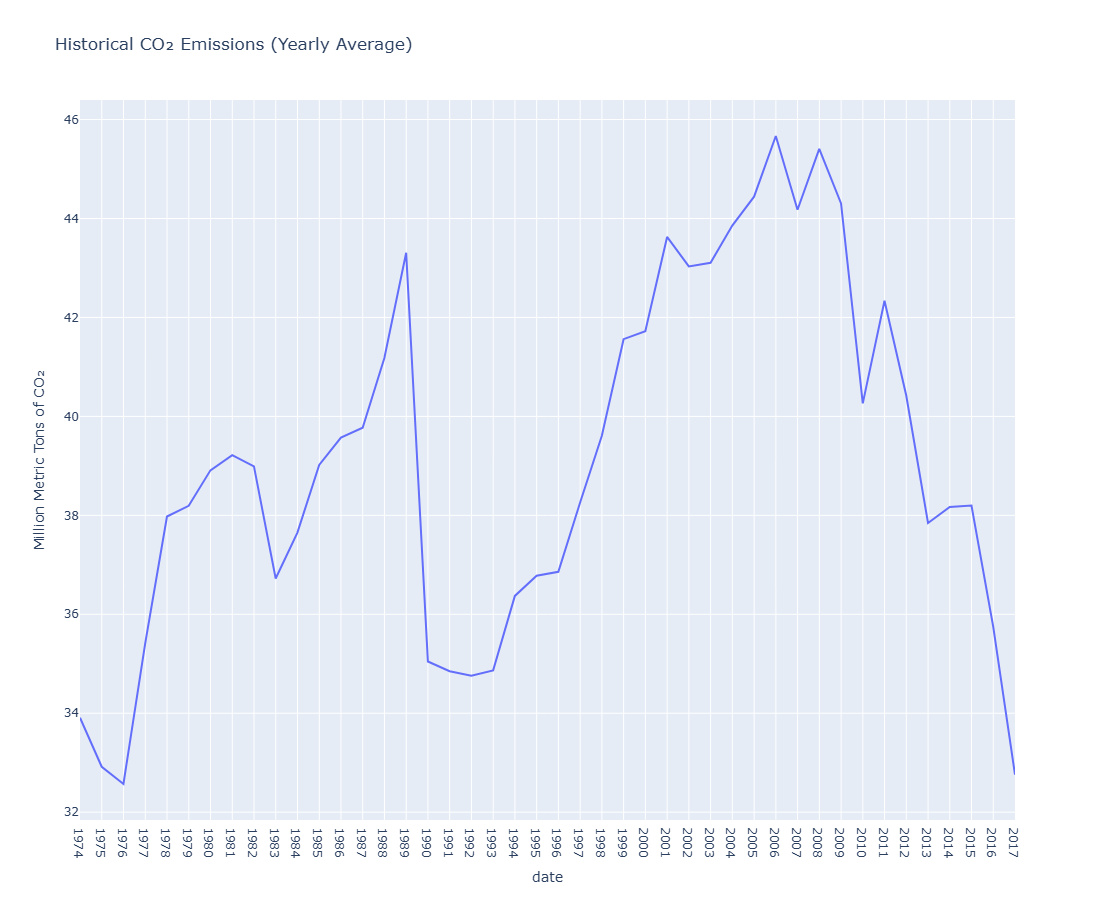

In [142]:
fig = px.line(
    df_yearly,
    x=df_yearly.index,
    y='Value',
    title='Historical CO₂ Emissions (Yearly Average)',
    labels={
        'Value': 'Million Metric Tons of CO₂',
        'index': 'Year'
    }
)
fig.update_xaxes(
    dtick="M12",
    tickformat="%Y"
)
fig.update_layout(width=800, height=900)
fig.show()

## 3. Checking for Stationarity

### Conducting the Augmented Dickey-Fuller (ADF) Test

In [147]:
df['CO2_diff'] = df['Value'].diff()

In [149]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['CO2_diff'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")


ADF Statistic: -11.378211786725661
p-value: 8.639957699255683e-21


#### ADF Test Results:

#### ADF Statistic: The value of –11.38 is very negative, suggesting a strong trend away from having a unit root.

#### p-value: At around 8.64e-21, the p-value is astronomically lower than the common threshold of 0.05. This means we can confidently reject the null hypothesis (that the series has a unit root) and conclude that the series is stationary.

### Plotting the Autocorrelation Function (ACF)

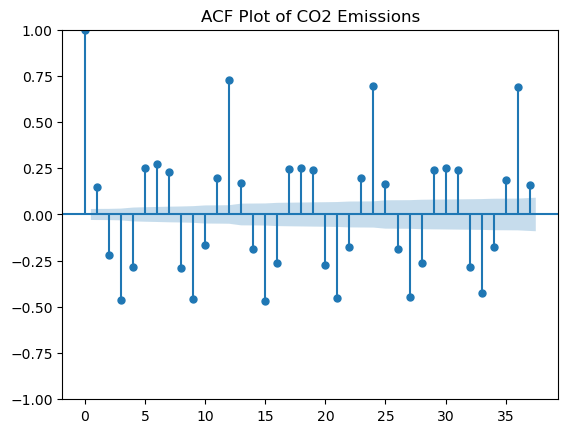

In [150]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['CO2_diff'].dropna())
plt.title("ACF Plot of CO2 Emissions")
plt.show()


### ACF Plot:

#### The ACF plot for the differenced CO₂ emissions visually confirms the statistical test. In a stationary series, you'd expect the autocorrelation to decay quickly after a few lags. If you observe a rapid drop-off in the autocorrelations, it suggests that any remaining patterns are minimal, strengthening the case for stationarity.

## 4. Building a Forecasting Model

#### Fitting an ARIMA Model

In [162]:
from statsmodels.tsa.arima.model import ARIMA

In [182]:
df_new = df[['CO2_diff']].dropna().copy() 

In [183]:
df_new = df_new.reset_index()

In [184]:
print(df_new.head())

        date  CO2_diff
0 1973-02-01    -7.634
1 1973-03-01    -0.358
2 1973-04-01    -3.242
3 1973-05-01     0.956
4 1973-06-01     4.740


In [185]:
df_new.set_index('date', inplace=True)

In [205]:
forecast_start = pd.Timestamp('2016-07-01')
df_train = df_new[df_new.index < forecast_start]

In [206]:
model = ARIMA(df_new['CO2_diff'], order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Gurunath Chavan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Gurunath Chavan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\Gurunath Chavan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Gurunath Chavan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\Gurunath Chavan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date 

                               SARIMAX Results                                
Dep. Variable:               CO2_diff   No. Observations:                 4320
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -14699.715
Date:                Mon, 19 May 2025   AIC                          29407.430
Time:                        22:13:29   BIC                          29432.914
Sample:                             0   HQIC                         29416.429
                               - 4320                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0229      0.035      0.653      0.514      -0.046       0.092
ar.L1          0.6519      0.010     64.640      0.000       0.632       0.672
ma.L1         -0.8985      0.007   -137.539      0.0

## 5. Evaluating Model Residuals

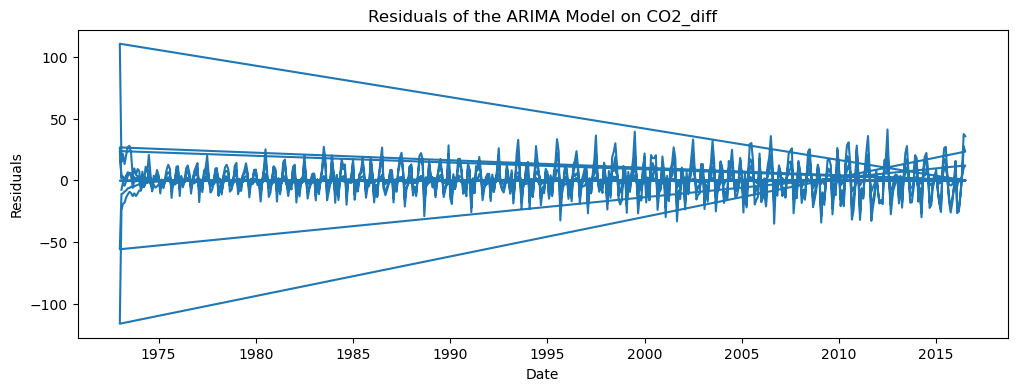

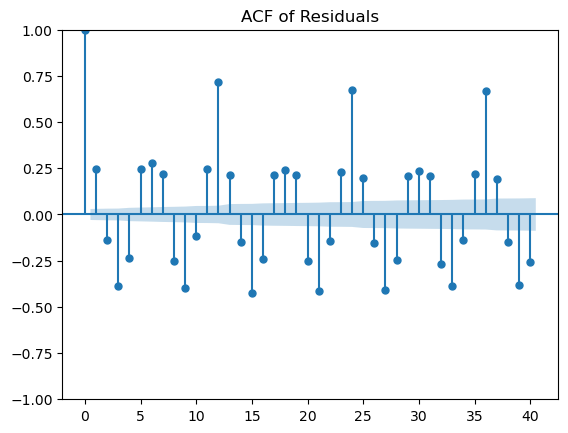

In [212]:
residuals = model_fit.resid

plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model on CO2_diff')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()


sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('ACF of Residuals')
plt.show()

### Residuals of the ARIMA Model on CO₂_diff:

#### Visual Inspection: The top plot shows the residuals over time, which should ideally fluctuate randomly around zero if the model has captured the primary structure of the series. In your plot, the residuals appear to oscillate above and below the zero line without any obvious trend, indicating that the model isn’t systematically over- or under-predicting.

#### Variance Stability: Although there seems to be a slight increase in variability over the time span, the deviations appear generally balanced. Any noticeable change in variance might warrant further examination (for example, testing for heteroskedasticity), but if the fluctuations remain relatively minor and symmetric, it suggests that the model does a decent job at capturing the temporal patterns.

### ACF of Residuals:

#### Autocorrelation Examination: The autocorrelation function (ACF) plot displays the correlation of the residuals with their own lags. The key purpose here is to check that there is no significant residual autocorrelation—meaning that after fitting the ARIMA model, what’s left (the residuals) behaves like white noise.

#### Confidence Intervals: The blue shaded area represents the 95% confidence interval. Ideally, most of the autocorrelation spikes should lie within this band. While your plot shows some spikes at various lags, what matters is whether these spikes are statistically significant (i.e., outside the confidence limits). If most of them are within the limit, it indicates that the ARIMA model has appropriately captured the structure in your time series.

#### Overall Comment: The combination of these two plots suggests that the ARIMA model has, for the most part, succeeded in modeling the dynamics of CO₂_diff. The residual time series does not display any systematic patterns that would indicate missed structure, and the ACF plot does not reveal prominent autocorrelation outside the expected confidence bounds. If any spikes in the ACF do fall outside the intervals, they may point to minor model inadequacies or short-term dependencies that could be explored further. However, if they’re sporadic and not consistent, the model is largely performing as intended.

## 6. Forecasting Future Values for the Next 10 Years

In [204]:
df_new.tail()

,CO2_diff
date,
2016-03-01,-17.109
2016-04-01,-2.182
2016-05-01,15.625
2016-06-01,42.634
2016-07-01,29.884


In [208]:
forecast_steps = 120
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

C:\Users\Gurunath Chavan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Gurunath Chavan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [209]:
forecast_index = pd.date_range(start=forecast_start, periods=forecast_steps, freq='MS')

In [210]:
forecast_values.index = forecast_index
conf_int.index = forecast_index

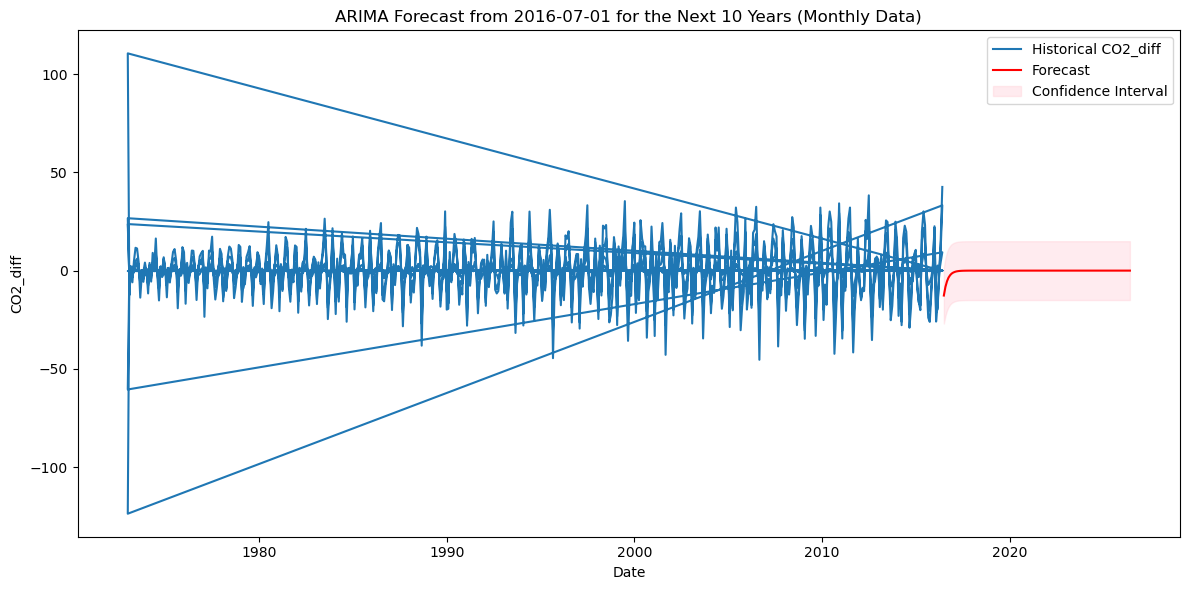

In [211]:
plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train['CO2_diff'], label='Historical CO2_diff')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Forecast from 2016-07-01 for the Next 10 Years (Monthly Data)')
plt.xlabel('Date')
plt.ylabel('CO2_diff')
plt.legend()
plt.tight_layout()
plt.show()

### Historical and Forecasted Data: – The blue line shows the historical values of CO₂_diff, while the red line represents the forecasted values starting from July 1, 2016. – The forecast extends 10 years into the future (up to 2026), which allows to see how the model extrapolates past patterns into the future.

### Confidence Intervals and Uncertainty: – The light pink shaded area indicates the confidence interval around the forecast. Notice how this band widens as one moves further from the start date. This widening reflects increasing uncertainty in the predictions as the forecast horizon extends, a common characteristic of time series forecasting.

### Variability in CO₂_diff: – The y-axis ranges roughly from -100 to +100, capturing the variability in CO₂_diff. The oscillations in the historical data suggest that the underlying series has notable fluctuations—information that is crucial when assessing the performance of the ARIMA model. – The forecasted red line appears to maintain the historical trend pattern, which suggests that the model is replicating the dynamics observed in the past. However, the widening confidence interval reminds us that future behavior might diverge, and caution is needed when interpreting these projections.

### Model Adequacy Evidence: – The fact that the historical data and the forecast appear to be coherent suggests that the ARIMA model has captured the key temporal dynamics in the series. – However, it is also critical to look at residual diagnostics (such as residual plots and ACF of the residuals) to ensure that the model has adequately filtered out any structure from the noise.

### Overall, the graph is a useful visual summary of ARIMA forecast for CO₂_diff. It shows that while the model projects the historical trends forward, there is an expected increase in uncertainty over time. This visual tool is valuable for understanding both the immediate future and the limits of long-term predictability in CO₂ dynamics, which is particularly important for planning and policy decisions related to environmental management and climate change.